# Create Directories and Dataset Splits

In [1]:
%pwd

'/home/exh4748/ProjectTortoise/ALPHA PHASE'

In [2]:
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image
import numpy as np

# Paths to your original dataset directory and where you want to save the splits
data_dir = '/home/exh4748/ProjectTortoise/data'  # Original dataset path
output_dir = '/home/exh4748/ProjectTortoise/split_data'  # Output directory

# Define ratios for the splits
train_ratio = 0.7
val_ratio = 0.15  # The rest will be for the test set

# Create the output directories for train, validation, and test
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Minimum number of images required for each class
min_images = 100

# Data augmentation settings
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Function to augment images in a class directory to reach min_images
def augment_images(class_name, class_path, target_count):
    image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
    num_images = len(image_files)

    if num_images >= target_count:
        return  # No need for augmentation

    for img_file in image_files:
        img_path = os.path.join(class_path, img_file)
        img = Image.open(img_path)
        x = np.array(img)
        x = x.reshape((1,) + x.shape)  # Reshape for the ImageDataGenerator

        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=class_path, save_prefix=class_name, save_format='jpeg'):
            i += 1
            num_images += 1
            if num_images >= target_count:
                break

# Function to split images into train, validation, and test sets
def split_dataset(class_name, class_path, output_dir):
    image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]

    # Check if augmentation is needed to reach minimum image count
    if len(image_files) < min_images:
        augment_images(class_name, class_path, min_images)
        image_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]  # Refresh file list

    # Split into train and temp (val+test) sets first
    train_files, temp_files = train_test_split(image_files, test_size=1 - train_ratio, random_state=42)
    
    # Split the temp set into validation and test sets
    val_files, test_files = train_test_split(temp_files, test_size=val_ratio/(val_ratio + (1 - train_ratio - val_ratio)), random_state=42)

    # Function to copy files to the new folder structure
    def copy_files(file_list, target_dir):
        class_target_dir = os.path.join(target_dir, class_name)
        os.makedirs(class_target_dir, exist_ok=True)
        for file in file_list:
            shutil.copy(os.path.join(class_path, file), os.path.join(class_target_dir, file))

    # Copy the files
    copy_files(train_files, train_dir)
    copy_files(val_files, val_dir)
    copy_files(test_files, test_dir)

# Loop through each class directory and apply the split
for class_name in os.listdir(data_dir):
    class_path = os.path.join(data_dir, class_name)
    if os.path.isdir(class_path):  # Only process directories (ignore other files if any)
        split_dataset(class_name, class_path, output_dir)

print("Dataset split into train, validation, and test sets successfully.")

/usr/local/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
2024-11-18 16:53:39.207948: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-18 16:53:39.207979: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-18 16:53:39.208613: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-18 16:53:39.212142: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is

Dataset split into train, validation, and test sets successfully.


In [3]:
import os

# Function to count images in each class folder
def check_min_images(directory, min_images=10):
    all_classes_meet_min = True
    for class_name in os.listdir(directory):
        class_path = os.path.join(directory, class_name)
        if os.path.isdir(class_path):
            num_images = len([f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))])
            print(f"Class '{class_name}' in '{directory}' has {num_images} images.")
            if num_images < min_images:
                print(f"Warning: Class '{class_name}' in '{directory}' has fewer than {min_images} images!")
                all_classes_meet_min = False
    return all_classes_meet_min

# Check the train, validation, and test directories
print("Checking training directory:")
train_check = check_min_images(train_dir)
print("\nChecking validation directory:")
val_check = check_min_images(val_dir)
print("\nChecking test directory:")
test_check = check_min_images(test_dir)

# Overall check
if train_check and val_check and test_check:
    print("\nAll classes in each split have at least 10 images.")
else:
    print("\nSome classes in one or more splits have fewer than 10 images.")

Checking training directory:
Class 'kobe' in '/home/exh4748/ProjectTortoise/split_data/train' has 86 images.
Class 'giannis' in '/home/exh4748/ProjectTortoise/split_data/train' has 78 images.
Class 'steph' in '/home/exh4748/ProjectTortoise/split_data/train' has 84 images.
Class 'steph_augmented' in '/home/exh4748/ProjectTortoise/split_data/train' has 101 images.
Class 'timmy_augmented' in '/home/exh4748/ProjectTortoise/split_data/train' has 129 images.
Class 'timmy' in '/home/exh4748/ProjectTortoise/split_data/train' has 79 images.
Class 'efaz' in '/home/exh4748/ProjectTortoise/split_data/train' has 93 images.
Class 'giannis_augmented' in '/home/exh4748/ProjectTortoise/split_data/train' has 127 images.
Class 'efaz_augmented' in '/home/exh4748/ProjectTortoise/split_data/train' has 127 images.
Class 'ahmed_augmented' in '/home/exh4748/ProjectTortoise/split_data/train' has 151 images.
Class 'jokic_augmented' in '/home/exh4748/ProjectTortoise/split_data/train' has 110 images.
Class 'ahmed'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to your split dataset directories
train_dir = '/home/exh4748/ProjectTortoise/split_data/train'
val_dir = '/home/exh4748/ProjectTortoise/split_data/val'
test_dir = '/home/exh4748/ProjectTortoise/split_data/test'

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values to [0, 1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescale for validation and test sets, no augmentation
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Create the data loaders (generators)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Adjust to match your model's expected input size, e.g., VGG16 expects 224x224
    batch_size=32,
    class_mode='categorical'  # Set to 'categorical' for multi-class classification
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Set shuffle to False for the test set to maintain order for evaluation
)

Found 1445 images belonging to 14 classes.
Found 420 images belonging to 14 classes.
Found 427 images belonging to 14 classes.


# GPU Server Things

In [5]:
import tensorflow as tf

# Check if any GPU is detected
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  4


2024-11-18 16:53:46.683868: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-18 16:53:46.685123: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-18 16:53:46.686396: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [6]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        # Set TensorFlow to use only the first GPU
        tf.config.set_visible_devices(gpus[0], 'GPU')
        print(f"Using GPU: {gpus[0]}")
    except RuntimeError as e:
        print(e)

Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [7]:
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Place the model creation and training within a GPU context
with tf.device('/GPU:0'):  # Replace '0' with the GPU ID if using a different GPU
    # Load the base model
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

    # Freeze base model layers
    for layer in base_model.layers:
        layer.trainable = False

    # Add custom layers
    x = base_model.output
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    predictions = Dense(14, activation='softmax')(x)  # Adjust to 14 classes

    # Create the final model
    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    print("Model is set to use GPU for computations.")

2024-11-18 16:54:01.848282: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-18 16:54:01.850492: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-18 16:54:01.852063: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

Model is set to use GPU for computations.


In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Model Compiling

In [11]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

Epoch 1/20
46/46 [==============================] - 9s 188ms/step - loss: 0.5510 - accuracy: 0.8111 - val_loss: 0.4360 - val_accuracy: 0.8214
Epoch 2/20
46/46 [==============================] - 9s 187ms/step - loss: 0.5153 - accuracy: 0.8180 - val_loss: 0.4313 - val_accuracy: 0.8429
Epoch 3/20
46/46 [==============================] - 9s 189ms/step - loss: 0.5310 - accuracy: 0.8021 - val_loss: 0.4014 - val_accuracy: 0.8452
Epoch 4/20
46/46 [==============================] - 9s 193ms/step - loss: 0.5224 - accuracy: 0.8118 - val_loss: 0.4452 - val_accuracy: 0.8262
Epoch 5/20
46/46 [==============================] - 9s 194ms/step - loss: 0.4659 - accuracy: 0.8318 - val_loss: 0.4431 - val_accuracy: 0.8357
Epoch 6/20
46/46 [==============================] - 9s 192ms/step - loss: 0.4929 - accuracy: 0.8187 - val_loss: 0.3874 - val_accuracy: 0.8476
Epoch 7/20
46/46 [==============================] - 9s 189ms/step - loss: 0.4371 - accuracy: 0.8388 - val_loss: 0.3986 - val_accuracy: 0.8452
Epoch 

In [12]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

14/14 [==============================] - 1s 49ms/step - loss: 0.3879 - accuracy: 0.8407
Test Loss: 0.387937992811203
Test Accuracy: 84.07%


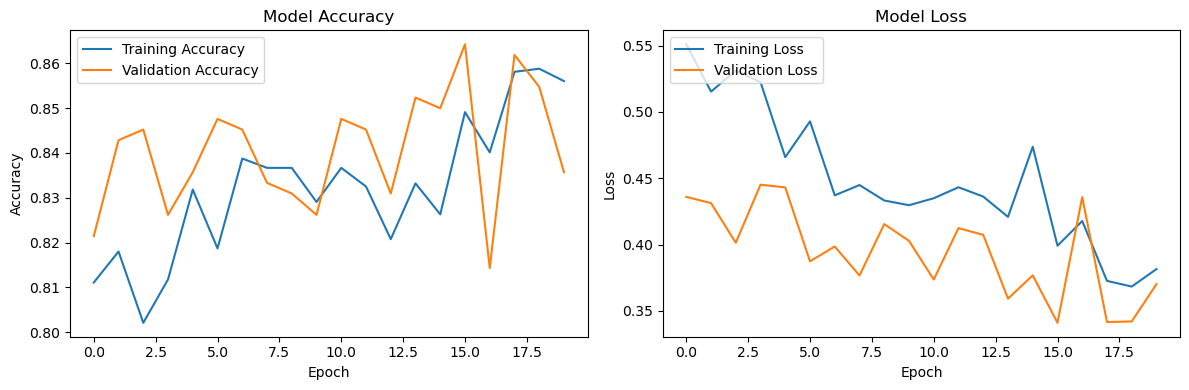

In [13]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function to plot the training history
plot_training_history(history)

In [14]:
# Save the model after training
model.save('basemodel.h5')

/home/exh4748/.local/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
